The reference article: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

My notes besides this notebook: https://workflowy.com/#/ad9b05048f6d

Dataset: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

Another article: 12 Useful Pandas Techniques in Python for Data Manipulation: https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

# Exploratory analysis in Python using Pandas

In [112]:
# practice data set - loan prediction problem
!ls

Sample_Submission.csv test.csv
Tutorial.ipynb        train.csv


In [113]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/cagrisarigoz/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


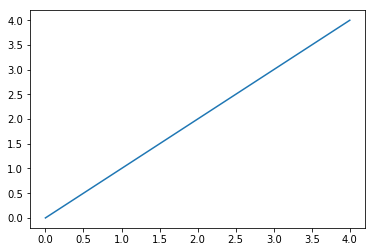

In [114]:
# plotting an inline plot
plot(arange(5))

In [115]:
# Importing libraries and the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("train.csv")

## Quick Data Exploration

In [116]:
df.head(10) #Get first 10 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [117]:
df.describe() #Get summary of numerical values

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

1. LoanAmount has (614 – 592) 22 missing values.
2. Loan_Amount_Term has (614 – 600) 14 missing values.
3. Credit_History has (614 – 564) 50 missing values.
4. We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
5. The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

Please note that we can get an idea of a possible skew in the data by comparing the mean to the **median, i.e. the 50 figure.**

For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The **frequency table** can be printed by following command:

In [118]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Distribution analysis

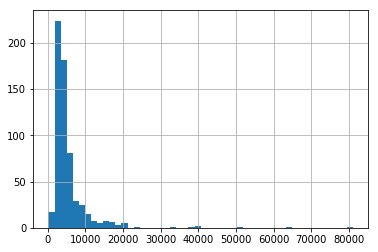

In [119]:
# Histogram of ApplicantIncome
df['ApplicantIncome'].hist(bins=50)

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

Histogram without proper bin number will give us less information. We can better understand the distributions by looking at the box plots as well.

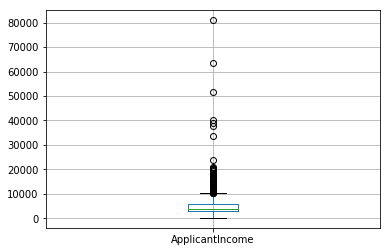

In [120]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

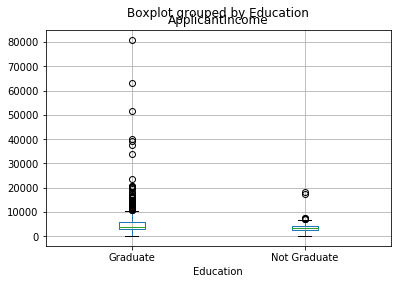

In [121]:
df.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Now, Let’s look at the histogram and boxplot of LoanAmount using the following command:

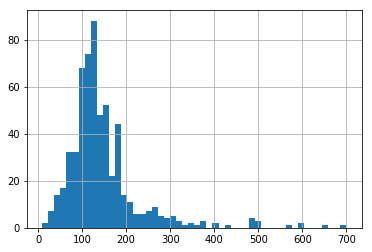

In [122]:
df['LoanAmount'].hist(bins=50)

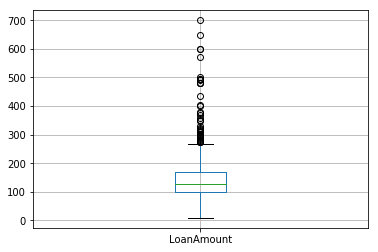

In [123]:
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding. We will take this up in coming sections.

## Categorical variable analysis
We will use Excel style pivot table and cross-tabulation.

In [124]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Plotting the same data in a bar chart:

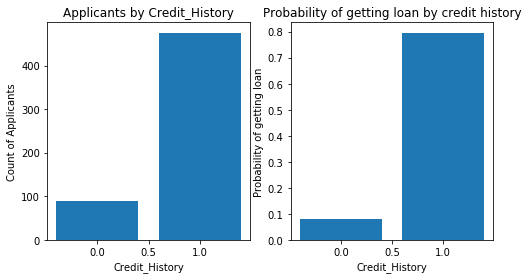

In [125]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
#temp1.plot(kind='bar')
ax1.bar(temp1.index, temp1 )
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")

ax2 = fig.add_subplot(122)
#temp2.plot(kind = 'bar')
ax2.bar(temp2.index, temp2['Loan_Status'])
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

plt.show()

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. You can plot similar graphs by Married, Self-Employed, Property_Area, etc.

Alternately, these two plots can also be visualized by combining them in a stacked chart::

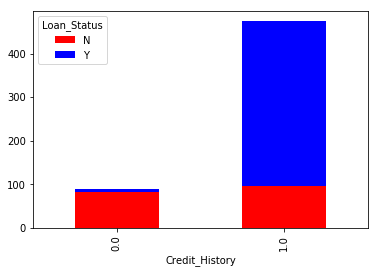

In [126]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

You can also add gender into the mix (similar to the pivot table in Excel):

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307


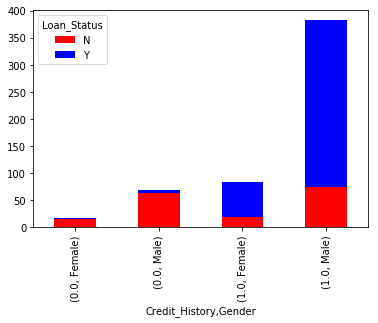

In [127]:
temp4 = pd.crosstab([df['Credit_History'], df['Gender']], df['Loan_Status'])
print(temp4)
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

# Data Munging in Python : Using Pandas
## Data munging – recap of the need
While our exploration of the data, we found a few problems in the data set, which needs to be solved before the data is ready for a good model. This exercise is typically referred as “Data Munging”. Here are the problems, we are already aware of:

1. There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables.
2. While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately.

In addition to these problems with numerical fields, we should also look at the non-numerical fields i.e. Gender, Property_Area, Married, Education and Dependents to see, if they contain any useful information.

## Check missing values in the dataset

Let us look at missing values in all the variables because most of the models don’t work with missing data and even if they do, imputing them helps more often than not. So, let us check the number of nulls / NaNs in the dataset

In [128]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Though the missing values are not very high in number, but many variables have them and each one of these should be estimated and added in the data.

Note: Remember that missing values may not always be NaNs. For instance, if the Loan_Amount_Term is 0, does it makes sense or would you consider that missing? I suppose your answer is missing and you’re right. So we should check for values which are unpractical.

## How to fill missing values in LoanAmount?
There are numerous ways to fill the missing values of loan amount – the simplest being replacement by mean, which can be done by following code:

In [129]:
 # df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

The other extreme could be to build a **supervised learning model to predict loan amount** on the basis of other variables and then use age along with other variables to predict survival.

Since, the purpose now is to bring out the steps in data munging, I’ll rather take an approach, which lies some where in between these 2 extremes. A key hypothesis is that the whether a person is educated or self-employed can combine to give a good estimate of loan amount.

First, let’s look at the boxplot to see if a trend exists:

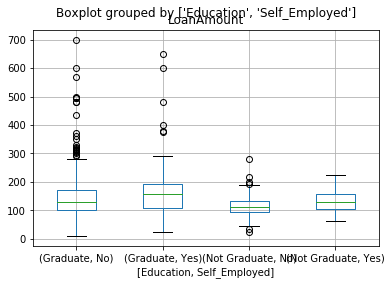

In [130]:
df.boxplot(column='LoanAmount', by=['Education', 'Self_Employed'])

Thus we see some variations in the median of loan amount for each group and this can be used to impute the values. But first, we have to ensure that each of Self_Employed and Education variables should not have a missing values.

As we say earlier, Self_Employed has some missing values. Let’s look at the frequency table:

In [131]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. This can be done using the following code:

In [132]:
 df['Self_Employed'].fillna('No',inplace=True)

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:

In [133]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

This should provide you a good way to impute missing values of loan amount.

NOTE : This method will work only if you have not filled the missing values in Loan_Amount variable using the previous approach, i.e. using mean.

## How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?
Let’s analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

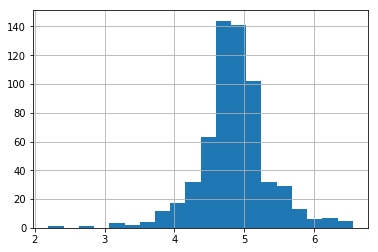

In [134]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

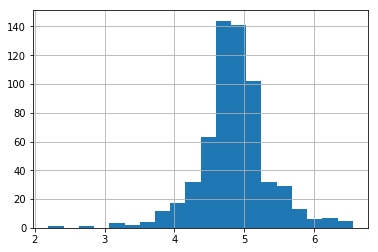

In [135]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

Now we see that the distribution is much better than before. I will leave it upto you to impute the missing values for Gender, Married, Dependents, Loan_Amount_Term, Credit_History. Also, I encourage you to think about possible additional information which can be derived from the data. For example, creating a column for LoanAmount/TotalIncome might make sense as it gives an idea of how well the applicant is suited to pay back his loan.

Next, we will look at making predictive models.

**To-Do:** Doing the suggested work on the paragraph above

# Building a Predictive Model in Python
After we have made the data useful for modeling, let’s now look at the python code to create a predictive model on our data set. Skicit-Learn (sklearn) is the most commonly used library in Python for this purpose and we will follow the trail.

Since sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset. This can be done using the following code:

In [136]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

Encoding categorical variables between 0 and n_classes-1 with *LabelEncoder* function in sklearn:

In [137]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

Next, we will import the required modules. Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores

In [138]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

## Logistic Regression

Let’s make our first Logistic Regression model. One way would be to take all the variables into the model but this might result in overfitting.

We can easily make some intuitive hypothesis to set the ball rolling. The chances of getting a loan will be higher for:

1. Applicants having a credit history (remember we observed this in exploration?)
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

So let’s make our first model with ‘Credit_History’.

In [139]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [140]:
# We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


Generally we expect the accuracy to increase on adding variables. But this is a more challenging case. The accuracy and cross-validation score are not getting impacted by less important variables. Credit_History is dominating the mode. We have two options now:

1. Feature Engineering: dereive new information and try to predict those. I will leave this to your creativity.
2. Better modeling techniques. Let’s explore this next.

**To-Do:** Feature engineering mentioned here

## Decision Tree

Decision tree is known to provide higher accuracy than logistic regression model.

In [141]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


Here the model based on categorical variables is unable to have an impact because Credit History is dominating over them. Let’s try a few numerical variables:

In [142]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.046%


Here we observed that although the accuracy went up on adding variables, the cross-validation score went down. This is the result of model **over-fitting** the data. Let’s try an even more sophisticated algorithm and see if it helps.

## Random Forest
An advantage with Random Forest is that we can make it work with all the features and it returns a feature importance matrix which can be used to select features.

In [143]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.530%


Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:
1. Reducing the number of predictors
2. Tuning the model parameters

Let’s try both of these. First we see the feature importance matrix from which we’ll take the most important features.

In [144]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

TotalIncome_log     0.270039
Credit_History      0.264176
LoanAmount_log      0.224547
Dependents          0.052802
Property_Area       0.049052
Loan_Amount_Term    0.043814
Married             0.028400
Education           0.023468
Gender              0.022608
Self_Employed       0.021094
dtype: float64


Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model a little bit:

In [145]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.899%
Cross-Validation Score : 81.599%


Notice that although accuracy reduced, but the cross-validation score is improving showing that the model is generalizing well. Remember that random forest models are not exactly repeatable. Different runs will result in slight variations because of randomization. But the output should stay in the ballpark.

You would have noticed that even after some basic parameter tuning on random forest, we have reached a cross-validation accuracy only slightly better than the original logistic regression model. This exercise gives us some very interesting and unique learning:

1. Using a more sophisticated model does not guarantee better results.
2. Avoid using complex modeling techniques as a black box without understanding the underlying concepts. Doing so would increase the tendency of overfitting thus making your models less interpretable
3. Feature Engineering is the key to success. Everyone can use an Xgboost models but the real art and creativity lies in enhancing your features to better suit the model.

So are you ready to take on the challenge? Start your data science journey with [Loan Prediction Problem](http://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction).

# Followup work by me
Some references:

1. Data Exploration, Preparation, Missing Value Treatment, Outlier Detection and Treatment, Feature Engineering: https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

## 1. Handiling missing values for other variables
Impute the missing values for Gender, Married, Dependents, Loan_Amount_Term, Credit_History.

First, let's start with doing all the data preparation steps from the scratch, since all missing values have been treated above.

In [146]:
# Initialization
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read training data into a new dataframe
df2 = pd.read_csv("train.csv")

# Since ~86% values are “No” for Self_Employed, it is safe to impute the missing values as “No”
df2['Self_Employed'].fillna('No',inplace=True)

# Impute LoanAmount with the median values for all the groups of unique values of Self_Employed and Education features.
table = df2.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df2['LoanAmount'].fillna(df2[df2['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

# Log transformation to nullify outliers' effect on LoanAmount
df2['LoanAmount_log'] = np.log(df2['LoanAmount'])

Populating the interactive namespace from numpy and matplotlib


/Users/cagrisarigoz/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Now, let's check the remaining missing values on the dataset:

In [147]:
 df2.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
dtype: int64

Let's take a look at all unique values of Gender:

In [148]:
df2['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Most of the applicants' gender is male. Let's take a look at LoanAmount_log for each Gender:

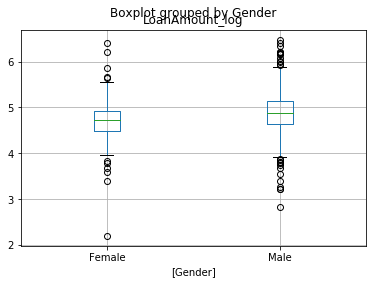

In [149]:
df2.boxplot(column='LoanAmount_log', by=['Gender'])

Since there is no obvious difference in the distribution of the LoanAmount_log for each gender, it might be useful to apply the most used value, i.e. Male for the missing values.

In [150]:
df2['Gender'].fillna(df2['Gender'].mode()[0], inplace=True)

Now, let's take a look at Married:

In [151]:
df2['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [152]:
df2['Dependents'][df2['Married'].isnull()]

104    NaN
228    NaN
435    NaN
Name: Dependents, dtype: object

Since there are only 3 missing values, and the Dependents feature is also missing for those 3 applicants, applying the mode makes sense here.

In [153]:
df2['Married'].fillna(df2['Married'].mode()[0], inplace=True)

Let's look at Dependents:

In [154]:
df2['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Let's check Dependents with Married & Gender breakdown:

In [155]:
pd.crosstab(df2['Dependents'], [df2['Married'], df2['Gender']])

Married        No         Yes     
Gender     Female Male Female Male
Dependents                        
0              60  111     20  154
1              13   10      6   73
2               2    6      5   88
3+              3    4      0   44

Since mode of Dependents is the same for all combinations, it makes sense to apply the mode to all missing values of Depentents:

In [156]:
df2['Dependents'].fillna(df2['Dependents'].mode()[0], inplace=True)

Now let's take a look at Loan_Amount_Term:

In [157]:
df2['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Although most of the loans are for 360 months, taking LoanAmount into consideration might make sense. Let's take a look at boxplot for each Loan_Amount_Term:

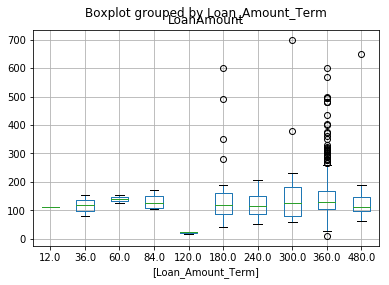

In [158]:
df2.boxplot(column='LoanAmount', by=['Loan_Amount_Term'])

Well, this boxplot is not very informative. And since there are very little number of occurences for some of the Loan_Amount_Term values, it's better to apply the mode to all missing values, again.

In [159]:
df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mode()[0], inplace=True)

Lastly, let's take a look at Credit_History:

In [160]:
df2.Credit_History.value_counts(dropna=False)

 1.0    475
 0.0     89
NaN      50
Name: Credit_History, dtype: int64

Since Credit_History is by far the most important feature for predicting the target value, finding a better way to figure out what to do with it is important.

In order to understand the general data health for those rows with missing Credit_History, let's import the training data from the scratch and take a look at those rows:

In [161]:
df3 = pd.read_csv("train.csv")
df3[df3.Credit_History.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 16 to 600
Data columns (total 13 columns):
Loan_ID              50 non-null object
Gender               49 non-null object
Married              50 non-null object
Dependents           50 non-null object
Education            50 non-null object
Self_Employed        44 non-null object
ApplicantIncome      50 non-null int64
CoapplicantIncome    50 non-null float64
LoanAmount           49 non-null float64
Loan_Amount_Term     50 non-null float64
Credit_History       0 non-null float64
Property_Area        50 non-null object
Loan_Status          50 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 5.5+ KB


It seems that most of the features have valid values, so deleting these rows would not be the best solution. But let's delete these rows on df3 to just test the performance of the predictions without these rows.

**Note:** I will do the deletion once I finish preparing the whole dataset with feature engineering. Let's record the index values for the non-missing values of Credit_History for future use.

In [162]:
ch_notnull = df2.Credit_History.notnull()

Keeping df3 aside, let's continue handling missing values on df2. 

Let's take a look at the distribution of Loan_Status for the rows that have missing Credit_History:

In [163]:
print('Loan_Status for the rows without missing Credit_History:')
print(pd.crosstab(df2['Credit_History'], df2['Loan_Status']))
print('Loan_Status for the rows with missing Credit_History:')
print(df2[df2.Credit_History.isnull()]['Loan_Status'].value_counts(dropna=False))

Loan_Status for the rows without missing Credit_History:
Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378
Loan_Status for the rows with missing Credit_History:
Y    37
N    13
Name: Loan_Status, dtype: int64


It can be seen that there are more Y values for the rows with missing Credit_History. Although it seems that imputing missing values as 1 for Credit_History is a good idea, we need to beware of the fact that when Credit_History is 0, it's very likely to have Loan_Status N.

So I think making a similar case imputation with respect to the Loan_Status would be a better choice.

In [164]:
ly = (df2['Loan_Status'] == 'Y')
ln = (df2['Loan_Status'] == 'N')

df2.loc[ly,'Credit_History'] = df2.loc[ly,'Credit_History'].fillna(1.0)
df2.loc[ln,'Credit_History'] = df2.loc[ln,'Credit_History'].fillna(0.0)

## 2. Feature engineering
Note from the article: Also, I encourage you to think about possible additional information which can be derived from the data. For example, creating a column for LoanAmount/TotalIncome might make sense as it gives an idea of how well the applicant is suited to pay back his loan.

For ApplicantIncome, we summed ApplicantIncome and CoapplicantIncome, and then took log of this TotalIncome. I think we might have better predictions if we allocate a less weight on CoapplicantIncome when summing these two features.

To validate this idea, I will try 3 different scenarios for the weight of CoapplicantIncome: 0.5, 0.75, 1.0

In [165]:
df2['TotalIncome_100'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']
df2['TotalIncome_100_log'] = np.log(df2['TotalIncome_100'])

df2['TotalIncome_075'] = df2['ApplicantIncome'] + df2['CoapplicantIncome'] * 0.75
df2['TotalIncome_075_log'] = np.log(df2['TotalIncome_075'])

df2['TotalIncome_050'] = df2['ApplicantIncome'] + df2['CoapplicantIncome'] * 0.5
df2['TotalIncome_050_log'] = np.log(df2['TotalIncome_050'])

Another good predictor for Loan_Status can be the ratio of Total Income and Loan Amount. Let's calculate this ratio for all TotalIncome scenarios:

In [166]:
# Total Income to Loan Amount Ratio
df2['TILAR_100'] = df2['TotalIncome_100'] / df2['LoanAmount']
df2['TILAR_075'] = df2['TotalIncome_075'] / df2['LoanAmount']
df2['TILAR_050'] = df2['TotalIncome_050'] / df2['LoanAmount']

Let's take a look at the distribution of these ratios for each Loan_Status:

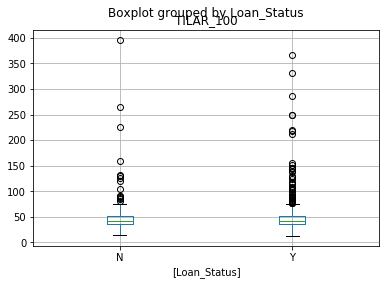

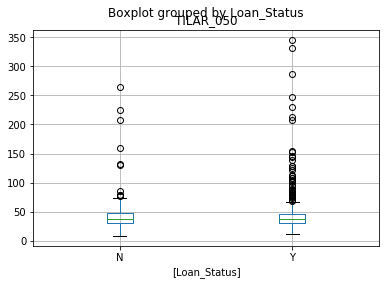

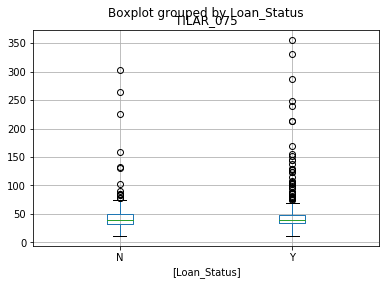

In [167]:
df2.boxplot(column='TILAR_100', by=['Loan_Status'])
df2.boxplot(column='TILAR_050', by=['Loan_Status'])
df2.boxplot(column='TILAR_075', by=['Loan_Status'])

Let's try taking log of the ratios:

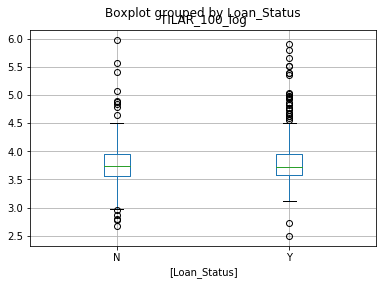

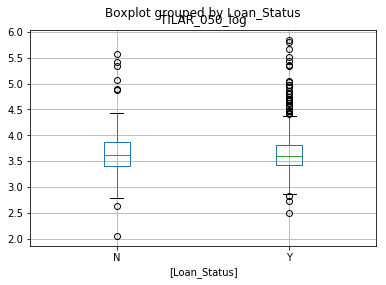

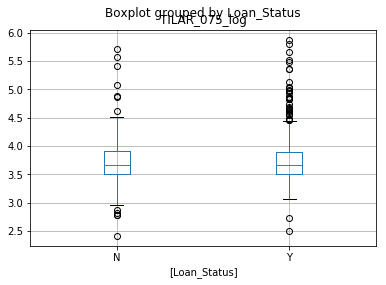

In [168]:
df2['TILAR_100_log'] = np.log(df2['TILAR_100'])
df2['TILAR_075_log'] = np.log(df2['TILAR_075'])
df2['TILAR_050_log'] = np.log(df2['TILAR_050'])

df2.boxplot(column='TILAR_100_log', by=['Loan_Status'])
df2.boxplot(column='TILAR_050_log', by=['Loan_Status'])
df2.boxplot(column='TILAR_075_log', by=['Loan_Status'])

It seems that the central disributions for each Loan_Status are close to each other, but there are more outliers in the upper end where Loan_Status is Y. 

So I think this ratio feature can be used as an extra feature, but not a replacement for TotalIncome and LoanAmount features.

## 3. Finalize predictions & make submission to [Loan Prediction Problem](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction/)

After preparing our dataset, lets generate df3 where the rows with missing Credit_Score values are deleted:

In [169]:
df3 = df2[ch_notnull]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 26 columns):
Loan_ID                564 non-null object
Gender                 564 non-null object
Married                564 non-null object
Dependents             564 non-null object
Education              564 non-null object
Self_Employed          564 non-null object
ApplicantIncome        564 non-null int64
CoapplicantIncome      564 non-null float64
LoanAmount             564 non-null float64
Loan_Amount_Term       564 non-null float64
Credit_History         564 non-null float64
Property_Area          564 non-null object
Loan_Status            564 non-null object
LoanAmount_log         564 non-null float64
TotalIncome_100        564 non-null float64
TotalIncome_100_log    564 non-null float64
TotalIncome_075        564 non-null float64
TotalIncome_075_log    564 non-null float64
TotalIncome_050        564 non-null float64
TotalIncome_050_log    564 non-null float64
TILAR_100              56

Let's make predictions with the latest Random Forest model that's used in the article:

In [171]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df2[i] = le.fit_transform(df2[i])

outcome_var = 'Loan_Status'
model_100 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var_100 = ['TotalIncome_100_log', 'TILAR_100_log', 'LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model_100, df2, predictor_var_100, outcome_var)

Accuracy : 84.528%
Cross-Validation Score : 83.064%


In [172]:
model_075 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var_075 = ['TotalIncome_075_log', 'TILAR_075_log', 'LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model_075, df2, predictor_var_075, outcome_var)

Accuracy : 85.179%
Cross-Validation Score : 82.735%


In [173]:
model_050 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var_050 = ['TotalIncome_050_log', 'TILAR_050_log', 'LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model_050, df2,predictor_var_050, outcome_var)

Accuracy : 84.691%
Cross-Validation Score : 82.900%


So there's a slight improvement in accuracy and cross-validation scores. Let's do the same thing for df3

In [174]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df3[i] = le.fit_transform(df3[i])

outcome_var = 'Loan_Status'
model_100_3 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var_100_3 = ['TotalIncome_100_log', 'TILAR_100_log', 'LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model_100_3, df3, predictor_var_100_3, outcome_var)

/Users/cagrisarigoz/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Accuracy : 83.333%
Cross-Validation Score : 81.209%


In [175]:
model_075_3 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var_075_3 = ['TotalIncome_075_log', 'TILAR_075_log', 'LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model_075_3, df3, predictor_var_075_3, outcome_var)

Accuracy : 83.333%
Cross-Validation Score : 81.384%


In [176]:
model_050_3 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var_050_3 = ['TotalIncome_050_log', 'TILAR_050_log', 'LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model_050_3, df3, predictor_var_050_3, outcome_var)

Accuracy : 83.688%
Cross-Validation Score : 81.566%


Althogh the performance of the model on df3 is worse, be noted that the performance on the test set might be better. So let's make predictions with all these 6 models and submit them.